In [93]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
# dataset pre-processing realated imports

from urllib.parse import urlparse
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# imports related to classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier


# DNN imports
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten, LSTM

from tensorflow.keras.optimizers import Adam

# Explainability imports
from sklearn.inspection import PartialDependenceDisplay


import sklearn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os



In [3]:
for dirname, _, filenames in os.walk("/home/onyxia/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
print("Done!")

print("--------------------------------")
print("-----------READ CSV-------------")
print("--------------------------------")

csic_filepath = "csic_database.csv"
csic_data = pd.read_csv(csic_filepath)
print("Done!")


/home/onyxia/.bashrc
/home/onyxia/.profile
/home/onyxia/.bash_logout
/home/onyxia/.sudo_as_admin_successful
/home/onyxia/.duckdbrc
/home/onyxia/.condarc
/home/onyxia/.gitconfig
/home/onyxia/.wget-hsts
/home/onyxia/work/ml-soc/notebook.ipynb
/home/onyxia/work/ml-soc/.gitignore
/home/onyxia/work/ml-soc/csic-2010-web-application-attacks-classifier.py
/home/onyxia/work/ml-soc/requirements.txt
/home/onyxia/work/ml-soc/csic_database.csv
/home/onyxia/work/ml-soc/README.md
/home/onyxia/work/ml-soc/.git/config
/home/onyxia/work/ml-soc/.git/HEAD
/home/onyxia/work/ml-soc/.git/index
/home/onyxia/work/ml-soc/.git/description
/home/onyxia/work/ml-soc/.git/packed-refs
/home/onyxia/work/ml-soc/.git/refs/remotes/origin/HEAD
/home/onyxia/work/ml-soc/.git/refs/heads/dev
/home/onyxia/work/ml-soc/.git/refs/heads/main
/home/onyxia/work/ml-soc/.git/objects/pack/pack-54987f618336e33bbbe4008883612748fdfb4268.pack
/home/onyxia/work/ml-soc/.git/objects/pack/pack-54987f618336e33bbbe4008883612748fdfb4268.idx
/home

In [4]:
n_features=csic_data.shape[1]
n_samples =csic_data.shape[0]


print("Number of samples:", n_samples)
print("Number of features:", n_features)

Number of samples: 61065
Number of features: 17


In [5]:
csic_data.tail()

,Unnamed: 0,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,lenght,content,classification,URL
61060,Anomalous,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=62216ADBBD9B91E17CA9AFEDCCC36275,NaN,close,NaN,NaN,1,http://localhost:8080/tienda1/miembros/editar....
61061,Anomalous,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=2317F5C0B1B7FAD18EB425E98DB102A3,application/x-www-form-urlencoded,Connection: close,Content-Length: 255,modo=registro&login=beaumont&password=quEratIt...,1,http://localhost:8080/tienda1/miembros/editar....
61062,Anomalous,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=7F0BA54A88B849EF752006D388E15CDD,NaN,close,NaN,NaN,1,http://localhost:8080/tienda1/miembros/editar....
61063,Anomalous,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=FB018FFB06011CFABD60D8E8AD58CA21,NaN,close,NaN,NaN,1,http://localhost:8080/tienda1/imagenes/3.gif/ ...
61064,Anomalous,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=3CC12010CDA952F123240EBAD79B55CC,NaN,close,NaN,NaN,1,http://localhost:8080/tienda1/imagenes/nuestra...


In [6]:
csic_data.columns

Index(['Unnamed: 0', 'Method', 'User-Agent', 'Pragma', 'Cache-Control',
       'Accept', 'Accept-encoding', 'Accept-charset', 'language', 'host',
       'cookie', 'content-type', 'connection', 'lenght', 'content',
       'classification', 'URL'],
      dtype='object')

## Data Visualization

<Axes: xlabel='Unnamed: 0', ylabel='count'>

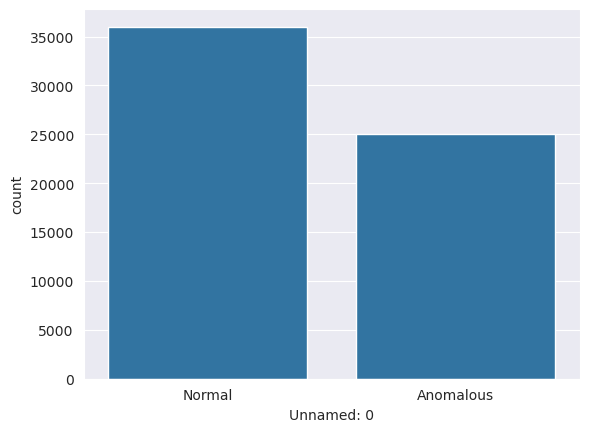

In [7]:
sns.set_style('darkgrid')
sns.countplot(data=csic_data, x='Unnamed: 0')



Dropping samples with at least 1 NaN value will make to lose all the other Request Methods besides POST, this option is discarded since dropping data is not usually a good choice


In [8]:
csic_data.head()

,Unnamed: 0,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,lenght,content,classification,URL
0,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,Connection: close,Content-Length: 68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...
3,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/autentic...
4,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,application/x-www-form-urlencoded,Connection: close,Content-Length: 63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...




Visualizing URL format


In [9]:
feature_names=[ 'Unnamed: 0','Method', 'User-Agent', 'Pragma', 'Cache-Control',
       'Accept', 'Accept-encoding', 'Accept-charset', 'language', 'host',
       'cookie', 'content-type', 'connection', 'lenght', 'content','classification',
        'URL']

X=csic_data[feature_names]
print(X)
#done

      Unnamed: 0 Method                                         User-Agent  \
0         Normal    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
1         Normal    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
2         Normal   POST  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
3         Normal    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
4         Normal   POST  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
...          ...    ...                                                ...   
61060  Anomalous    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
61061  Anomalous   POST  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
61062  Anomalous    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
61063  Anomalous    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
61064  Anomalous    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   

         Pragma Cache-Control  \
0      no-cache      no-cache 


## Removing not discriminatory features

Enumerating unique values for each feature


In [10]:


# Removing not discriminatory Features and making some adjustments on feature names
X = X.rename(columns={'Unnamed: 0': 'Class'})
X = X.rename(columns={'lenght': 'content_length'})


feature_names=[ 'Class','Method','host','cookie','Accept', 'content_length', 'content','classification','URL']

# Print the remaining data
X = X[feature_names]
print(X)



           Class Method            host  \
0         Normal    GET  localhost:8080   
1         Normal    GET  localhost:8080   
2         Normal   POST  localhost:8080   
3         Normal    GET  localhost:8080   
4         Normal   POST  localhost:8080   
...          ...    ...             ...   
61060  Anomalous    GET  localhost:8080   
61061  Anomalous   POST  localhost:8080   
61062  Anomalous    GET  localhost:8080   
61063  Anomalous    GET  localhost:8080   
61064  Anomalous    GET  localhost:8080   

                                            cookie  \
0      JSESSIONID=1F767F17239C9B670A39E9B10C3825F4   
1      JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5   
2      JSESSIONID=933185092E0B668B90676E0A2B0767AF   
3      JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0   
4      JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2   
...                                            ...   
61060  JSESSIONID=62216ADBBD9B91E17CA9AFEDCCC36275   
61061  JSESSIONID=2317F5C0B1B7FAD18EB425E98DB102A3 

In [11]:


y=X.Class
print(y)



0           Normal
1           Normal
2           Normal
3           Normal
4           Normal
           ...    
61060    Anomalous
61061    Anomalous
61062    Anomalous
61063    Anomalous
61064    Anomalous
Name: Class, Length: 61065, dtype: object


In [12]:


size=X.shape[1]
# Get list of categorical variables
s = (X.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)



Categorical variables:
['Class', 'Method', 'host', 'cookie', 'Accept', 'content_length', 'content', 'URL']




Load Models



## Pre-processing on the feature: Content Length¶


In [13]:


print(X.content_length)



0                        NaN
1                        NaN
2         Content-Length: 68
3                        NaN
4         Content-Length: 63
                ...         
61060                    NaN
61061    Content-Length: 255
61062                    NaN
61063                    NaN
61064                    NaN
Name: content_length, Length: 61065, dtype: object




Operations on the 'content_lenght' feature


In [14]:


#replace NaN values with 0
#removing the 'Content-Lenght' string and keeping only the numerical value

X['content_length'] = X['content_length'].astype(str)
X['content_length'] = X['content_length'].str.extract(r'(\d+)')
X['content_length'] = pd.to_numeric(X['content_length'], errors='coerce').fillna(0)
print(X.content_length)



0          0.0
1          0.0
2         68.0
3          0.0
4         63.0
         ...  
61060      0.0
61061    255.0
61062      0.0
61063      0.0
61064      0.0
Name: content_length, Length: 61065, dtype: float64


GET methods have the content_length set to 0 since they where all NaN (this method does not have to provide content)

In [15]:
filtered_length = X.loc[X['Method'] == 'GET', 'content_length']
print(filtered_length)

0        0.0
1        0.0
3        0.0
5        0.0
7        0.0
        ... 
61058    0.0
61060    0.0
61062    0.0
61063    0.0
61064    0.0
Name: content_length, Length: 43088, dtype: float64


## URL PRE-PROCESSING

In [16]:
# Count the occurrences of each URL and display the top 10 most common URLs
url_counts = X['URL'].value_counts()
most_common_urls = url_counts.head(10)  # Extract the top 10 most common strings

print("Most common URLs:")
for i, (url, count) in enumerate(most_common_urls.items(), 1):
    print(f"{i}. URL: {url} - Count: {count}")


Most common URLs:
1. URL: http://localhost:8080/tienda1/publico/anadir.jsp HTTP/1.1 - Count: 2441
2. URL: http://localhost:8080/tienda1/publico/autenticar.jsp HTTP/1.1 - Count: 2422
3. URL: http://localhost:8080/tienda1/publico/registro.jsp HTTP/1.1 - Count: 2417
4. URL: http://localhost:8080/tienda1/miembros/editar.jsp HTTP/1.1 - Count: 2412
5. URL: http://localhost:8080/tienda1/publico/pagar.jsp HTTP/1.1 - Count: 2379
6. URL: http://localhost:8080/tienda1/publico/caracteristicas.jsp HTTP/1.1 - Count: 2003
7. URL: http://localhost:8080/tienda1/publico/vaciar.jsp HTTP/1.1 - Count: 1965
8. URL: http://localhost:8080/tienda1/publico/entrar.jsp HTTP/1.1 - Count: 1938
9. URL: http://localhost:8080/tienda1/index.jsp HTTP/1.1 - Count: 1000
10. URL: http://localhost:8080/tienda1/miembros/salir.jsp HTTP/1.1 - Count: 1000


# **Utils for URL/Content pre-processing**

In [25]:
# Define various utility functions for URL preprocessing

def count_dot(url):
    count_dot = url.count('.')
    return count_dot

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

def count_http(url):
    return url.count('http')

def count_per(url):
    return url.count('%')

def count_ques(url):
    return url.count('?')

def count_hyphen(url):
    return url.count('-')

def count_equal(url):
    return url.count('=')

def url_length(url):
    return len(str(url))

#Hostname Length
def hostname_length(url):
    return len(urlparse(url).netloc)

def suspicious_words(url):
    score_map = {
        'error': 30,
        'errorMsg': 30,
        'id': 10,
        'errorID': 30,
        'SELECT': 50,
        'FROM': 50,
        'WHERE': 50,
        'DELETE': 50,
        'USERS': 50,
        'DROP': 50,
        'CREATE': 50,
        'INJECTED': 50,
        'TABLE': 50,
        'alert': 30,
        'javascript': 20,
        'cookie': 25,
        '--': 30,
        '.exe': 30,
        '.php': 20,
        '.js': 10,
        'admin': 10,
        'administrator': 10,
        '\'': 30,
        'password': 15,
        'login': 15,
        'incorrect': 20,
        'pwd': 15,
        'tamper': 25,
        'vaciar': 20,
        'carrito': 25,
        'wait': 30,
        'delay': 35,
        'set': 20,
        'steal': 35,
        'hacker': 35,
        'proxy': 35,
        'location': 30,
        'document.cookie': 40,
        'document': 20,
        'set-cookie': 40,
        'create': 40,
        'cmd': 40,
        'dir': 30,
        'shell': 40,
        'reverse': 30,
        'bin': 20,
        'cookiesteal': 40,
        'LIKE': 30,
        'UNION': 35,
        'include': 30,
        'file': 20,
        'tmp': 25,
        'ssh': 40,
        'exec': 30,
        'cat': 25,
        'etc': 30,
        'fetch': 25,
        'eval': 30,
        'wait': 30,
        'malware': 45,
        'ransomware': 45,
        'phishing': 45,
        'exploit': 45,
        'virus': 45,
        'trojan': 45,
        'backdoor': 45,
        'spyware': 45,
        'rootkit': 45,
        'credential': 30,
        'inject': 30,
        'script': 25,
        'iframe': 25,
        'src=': 25,
        'onerror': 30,
        'prompt': 20,
        'confirm': 20,
        'eval': 25,
        'expression': 30,
        'function\(': 20,
        'xmlhttprequest': 30,
        'xhr': 20,
        'window.': 20,
        'document.': 20,
        'cookie': 25,
        'click': 15,
        'mouseover': 15,
        'onload': 20,
        'onunload': 20,
    }

    matches = re.findall(r'(?i)' + '|'.join(score_map.keys()), url)

    total_score = sum(score_map.get(match.lower(), 0) for match in matches)
    return total_score

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters += 1
    return letters

def count_special_characters(url):
    special_characters = re.sub(r'[a-zA-Z0-9\s]', '', url)
    count = len(special_characters)
    return count

# Number of Parameters in URL
def number_of_parameters(url):
    params = urlparse(url).query
    return 0 if params == '' else len(params.split('&'))

# Number of Fragments in URL
def number_of_fragments(url):
    frags = urlparse(url).fragment
    return len(frags.split('#')) - 1 if frags == '' else 0

# URL is Encoded
def is_encoded(url):
    return int('%' in url.lower())

def unusual_character_ratio(url):
    total_characters = len(url)
    unusual_characters = re.sub(r'[a-zA-Z0-9\s\-._]', '', url)
    unusual_count = len(unusual_characters)
    ratio = unusual_count / total_characters if total_characters > 0 else 0
    return ratio


<>:16: SyntaxWarning: invalid escape sequence '\.'
<>:17: SyntaxWarning: invalid escape sequence '\.'
<>:18: SyntaxWarning: invalid escape sequence '\.'
<>:19: SyntaxWarning: invalid escape sequence '\.'
<>:20: SyntaxWarning: invalid escape sequence '\.'
<>:21: SyntaxWarning: invalid escape sequence '\.'
<>:22: SyntaxWarning: invalid escape sequence '\.'
<>:23: SyntaxWarning: invalid escape sequence '\.'
<>:132: SyntaxWarning: invalid escape sequence '\('
<>:16: SyntaxWarning: invalid escape sequence '\.'
<>:17: SyntaxWarning: invalid escape sequence '\.'
<>:18: SyntaxWarning: invalid escape sequence '\.'
<>:19: SyntaxWarning: invalid escape sequence '\.'
<>:20: SyntaxWarning: invalid escape sequence '\.'
<>:21: SyntaxWarning: invalid escape sequence '\.'
<>:22: SyntaxWarning: invalid escape sequence '\.'
<>:23: SyntaxWarning: invalid escape sequence '\.'
<>:132: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_5349/3204936291.py:16: SyntaxWarning: invalid escape sequence '\.

In [26]:
import re

In [27]:
# Apply URL preprocessing functions to the 'URL' column
X['count_dot_url'] = X['URL'].apply(count_dot)
X['count_dir_url'] = X['URL'].apply(no_of_dir)
X['count_embed_domain_url'] = X['URL'].apply(no_of_embed)
X['short_url'] = X['URL'].apply(shortening_service)
X['count-http'] = X['URL'].apply(count_http)
X['count%_url'] = X['URL'].apply(count_per)
X['count?_url'] = X['URL'].apply(count_ques)
X['count-_url'] = X['URL'].apply(count_hyphen)
X['count=_url'] = X['URL'].apply(count_equal)
X['hostname_length_url'] = X['URL'].apply(hostname_length)
X['sus_url'] = X['URL'].apply(suspicious_words)
X['count-digits_url'] = X['URL'].apply(digit_count)
X['count-letters_url'] = X['URL'].apply(letter_count)
X['url_length'] = X['URL'].apply(url_length)
X['number_of_parameters_url'] = X['URL'].apply(number_of_parameters)
X['number_of_fragments_url'] = X['URL'].apply(number_of_fragments)
X['is_encoded_url'] = X['URL'].apply(is_encoded)
X['special_count_url'] = X['URL'].apply(count_special_characters)
X['unusual_character_ratio_url'] = X['URL'].apply(unusual_character_ratio)

In [28]:
# Select and display new features for plotting
new_features = ['count_dot_url', 'count_dir_url', 'count_embed_domain_url', 'count-http',
                'count%_url', 'count?_url', 'count-_url', 'count=_url', 'url_length', 'hostname_length_url',
                'sus_url', 'count-digits_url', 'count-letters_url', 'number_of_parameters_url',
                'number_of_fragments_url', 'is_encoded_url','special_count_url','unusual_character_ratio_url']

set = X[new_features]

for new_feature in X.columns:
    if new_feature in X.columns:
        unique_count = X[new_feature].nunique()
        print(f"Number of unique values for {new_feature}: {unique_count}")
    else:
        print(f"Column '{new_feature}' does not exist in the DataFrame.")


Number of unique values for Class: 2
Number of unique values for Method: 3
Number of unique values for host: 2
Number of unique values for cookie: 61065
Number of unique values for Accept: 1
Number of unique values for content_length: 383
Number of unique values for content: 12091
Number of unique values for classification: 2
Number of unique values for URL: 13498
Number of unique values for count_dot_url: 9
Number of unique values for count_dir_url: 7
Number of unique values for count_embed_domain_url: 2
Number of unique values for short_url: 2
Number of unique values for count-http: 2
Number of unique values for count%_url: 34
Number of unique values for count?_url: 2
Number of unique values for count-_url: 8
Number of unique values for count=_url: 5
Number of unique values for hostname_length_url: 5
Number of unique values for sus_url: 61
Number of unique values for count-digits_url: 112
Number of unique values for count-letters_url: 259
Number of unique values for url_length: 417
N

# Removing Cookies as feature
 **Cookies are unique for each sample, this feature cannot be used as discriminant**


In [29]:
# Count the number of unique values in the 'cookie' column
unique_count = X['cookie'].nunique()
print(f"Count of unique values in 'cookie': {unique_count}")

Count of unique values in 'cookie': 61065


# Encoding categorical features

In [30]:
# Convert 'Accept' to numeric
X['Accept'] = X['Accept'].astype(str)
X['Accept'] = X['Accept'].str.extract(r'(\d+)')
X['Accept'] = pd.to_numeric(X['Accept'], errors='coerce').fillna(1)

In [31]:
# Encode categorical features
lb_make = LabelEncoder()
X["Method_enc"] = lb_make.fit_transform(X["Method"])
X["host_enc"] = lb_make.fit_transform(X["host"])
X["Accept_enc"] = lb_make.fit_transform(X["Accept"])

In [32]:
# Count unique values in encoded columns
unique_count_met = X["Method_enc"].nunique()
unique_count_host = X["host_enc"].nunique()
unique_count_acc = X["Accept_enc"].nunique()

print(f"Number of unique values for 'Method_enc': {unique_count_met}")
print(f"Number of unique values for 'host_enc': {unique_count_host}")
print(f"Number of unique values for 'Accept_enc': {unique_count_acc}")


Number of unique values for 'Method_enc': 3
Number of unique values for 'host_enc': 2
Number of unique values for 'Accept_enc': 2


In [33]:
# Display the first few rows of the dataset
X.head()

,Class,Method,host,cookie,Accept,content_length,content,classification,URL,count_dot_url,...,count-letters_url,url_length,number_of_parameters_url,number_of_fragments_url,is_encoded_url,special_count_url,unusual_character_ratio_url,Method_enc,host_enc,Accept_enc
0,Normal,GET,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,0.0,0.0,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1,2,...,31,48,0,0,0,9,0.145833,0,0,0
1,Normal,GET,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,0.0,0.0,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...,2,...,86,126,5,0,1,24,0.174603,0,0,0
2,Normal,POST,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,0.0,68.0,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...,2,...,39,57,0,0,0,10,0.140351,1,0,0
3,Normal,GET,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,0.0,0.0,NaN,0,http://localhost:8080/tienda1/publico/autentic...,2,...,92,125,5,0,1,21,0.152000,0,0,0
4,Normal,POST,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,0.0,63.0,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...,2,...,43,61,0,0,0,10,0.131148,1,0,0


In [34]:
# Display the last few rows of the dataset
X.tail()

,Class,Method,host,cookie,Accept,content_length,content,classification,URL,count_dot_url,...,count-letters_url,url_length,number_of_parameters_url,number_of_fragments_url,is_encoded_url,special_count_url,unusual_character_ratio_url,Method_enc,host_enc,Accept_enc
61060,Anomalous,GET,localhost:8080,JSESSIONID=62216ADBBD9B91E17CA9AFEDCCC36275,0.0,0.0,NaN,1,http://localhost:8080/tienda1/miembros/editar....,3,...,218,314,13,0,1,48,0.143312,0,0,0
61061,Anomalous,POST,localhost:8080,JSESSIONID=2317F5C0B1B7FAD18EB425E98DB102A3,0.0,255.0,modo=registro&login=beaumont&password=quEratIt...,1,http://localhost:8080/tienda1/miembros/editar....,2,...,40,58,0,0,0,10,0.137931,1,0,0
61062,Anomalous,GET,localhost:8080,JSESSIONID=7F0BA54A88B849EF752006D388E15CDD,0.0,0.0,NaN,1,http://localhost:8080/tienda1/miembros/editar....,3,...,43,62,0,0,0,11,0.129032,0,0,0
61063,Anomalous,GET,localhost:8080,JSESSIONID=FB018FFB06011CFABD60D8E8AD58CA21,0.0,0.0,NaN,1,http://localhost:8080/tienda1/imagenes/3.gif/ ...,2,...,34,54,0,0,0,11,0.166667,0,0,0
61064,Anomalous,GET,localhost:8080,JSESSIONID=3CC12010CDA952F123240EBAD79B55CC,0.0,0.0,NaN,1,http://localhost:8080/tienda1/imagenes/nuestra...,3,...,50,69,0,0,0,11,0.115942,0,0,0


In [35]:
# Define a function to apply another function to the 'content' column, handling NaNs
def apply_to_content(content, function):
    if pd.isna(content):
        return 0
    elif isinstance(content, str):
        return function(content)

In [36]:
# Apply content preprocessing functions to the 'content' column
X['count_dot_content'] = X['content'].apply(apply_to_content, function=count_dot)
X['count_dir_content'] = X['content'].apply(apply_to_content, function=no_of_dir)
X['count_embed_domain_content'] = X['content'].apply(apply_to_content, function=no_of_embed)
X['count%_content'] = X['content'].apply(apply_to_content, function=count_per)
X['count?_content'] = X['content'].apply(apply_to_content, function=count_ques)
X['count-_content'] = X['content'].apply(apply_to_content, function=count_hyphen)
X['count=_content'] = X['content'].apply(apply_to_content, function=count_equal)
X['content_length'] = X['content'].apply(apply_to_content, function=url_length)
X['sus_content'] = X['content'].apply(apply_to_content, function=suspicious_words)
X['count_digits_content'] = X['content'].apply(apply_to_content, function=digit_count)
X['count_letters_content'] = X['content'].apply(apply_to_content, function=letter_count)
X['special_count_content'] = X['content'].apply(apply_to_content, function=count_special_characters)
X['is_encoded_content'] = X['content'].apply(apply_to_content, function=is_encoded)


In [37]:
# Display unique counts for content-related features
new_content_features = ['count_dot_content', 'count_dir_content', 'count_embed_domain_content', 'count%_content', 'count?_content',
                        'count-_content', 'count=_content', 'sus_content', 'count_digits_content',
                        'count_letters_content', 'content_length', 'is_encoded_content', 'special_count_content']

selected_features_df = X[new_content_features]

for feature_name in selected_features_df.columns:
    if feature_name in X.columns:
        unique_count = selected_features_df[feature_name].nunique()
        print(f"Number of unique values for {feature_name}: {unique_count}")
    else:
        print(f"Column '{feature_name}' does not exist in the DataFrame.")

Number of unique values for count_dot_content: 8
Number of unique values for count_dir_content: 1
Number of unique values for count_embed_domain_content: 1
Number of unique values for count%_content: 34
Number of unique values for count?_content: 1
Number of unique values for count-_content: 8
Number of unique values for count=_content: 5
Number of unique values for sus_content: 57
Number of unique values for count_digits_content: 111
Number of unique values for count_letters_content: 230
Number of unique values for content_length: 383
Number of unique values for is_encoded_content: 2
Number of unique values for special_count_content: 87


In [38]:
# Display all columns of the dataset
X.columns

Index(['Class', 'Method', 'host', 'cookie', 'Accept', 'content_length',
       'content', 'classification', 'URL', 'count_dot_url', 'count_dir_url',
       'count_embed_domain_url', 'short_url', 'count-http', 'count%_url',
       'count?_url', 'count-_url', 'count=_url', 'hostname_length_url',
       'sus_url', 'count-digits_url', 'count-letters_url', 'url_length',
       'number_of_parameters_url', 'number_of_fragments_url', 'is_encoded_url',
       'special_count_url', 'unusual_character_ratio_url', 'Method_enc',
       'host_enc', 'Accept_enc', 'count_dot_content', 'count_dir_content',
       'count_embed_domain_content', 'count%_content', 'count?_content',
       'count-_content', 'count=_content', 'sus_content',
       'count_digits_content', 'count_letters_content',
       'special_count_content', 'is_encoded_content'],
      dtype='object')

# **Building the final dataset to use for the classification**

In [39]:
# Define the final set of labels to be used for classification
labels=['count_dot_url', 'count_dir_url', 'count_embed_domain_url', 'count-http',
                'count%_url', 'count?_url', 'count-_url', 'count=_url', 'url_length', 'hostname_length_url',
                'sus_url', 'count-digits_url', 'count-letters_url', 'number_of_parameters_url',
                'is_encoded_url','special_count_url','unusual_character_ratio_url',
                 #method
                'Method_enc',
                #content
                'count_dot_content','count%_content',
                 'count-_content','count=_content','sus_content','count_digits_content',
                  'count_letters_content','content_length',
               'is_encoded_content','special_count_content']
print(X[labels])


       count_dot_url  count_dir_url  count_embed_domain_url  count-http  \
0                  2              3                       0           1   
1                  2              3                       0           1   
2                  2              4                       0           1   
3                  2              3                       0           1   
4                  2              4                       0           1   
...              ...            ...                     ...         ...   
61060              3              3                       0           1   
61061              2              4                       0           1   
61062              3              4                       0           1   
61063              2              5                       0           1   
61064              3              4                       0           1   

       count%_url  count?_url  count-_url  count=_url  url_length  \
0               0           0 

In [40]:
# Extract the target variable for classification
y=X['classification']
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
61060    1
61061    1
61062    1
61063    1
61064    1
Name: classification, Length: 61065, dtype: int64


In [41]:
# Split the dataset into training and testing sets
print('computing...)')
x_tr, x_ts, y_tr, y_ts = train_test_split(X[labels], y, test_size=0.3, random_state=0)
print('Done!')

computing...)
Done!


In [42]:
# Display the first few rows of the training set
x_tr.head(5)

,count_dot_url,count_dir_url,count_embed_domain_url,count-http,count%_url,count?_url,count-_url,count=_url,url_length,hostname_length_url,...,count_dot_content,count%_content,count-_content,count=_content,sus_content,count_digits_content,count_letters_content,content_length,is_encoded_content,special_count_content
23480,2,3,0,1,0,1,0,1,91,14,...,0,0,0,0,0,0,0,0,0,0
45171,2,3,0,1,14,1,2,1,125,14,...,0,0,0,0,0,0,0,0,0,0
9460,2,4,0,1,0,0,0,0,57,14,...,0,0,0,0,0,0,0,0,0,0
9905,2,3,0,1,0,1,0,1,71,14,...,0,0,0,0,0,0,0,0,0,0
8937,2,4,0,1,0,0,0,0,57,14,...,0,0,0,1,50,0,31,33,0,2


In [43]:
# Display the last few rows of the training set
x_tr.tail(5)

,count_dot_url,count_dir_url,count_embed_domain_url,count-http,count%_url,count?_url,count-_url,count=_url,url_length,hostname_length_url,...,count_dot_content,count%_content,count-_content,count=_content,sus_content,count_digits_content,count_letters_content,content_length,is_encoded_content,special_count_content
45891,2,3,0,1,0,1,0,1,76,14,...,0,0,0,0,0,0,0,0,0,0
52416,2,4,0,1,0,0,0,0,57,14,...,0,0,0,1,50,0,32,34,0,2
42613,2,3,0,1,0,1,0,3,95,14,...,0,0,0,0,0,0,0,0,0,0
43567,3,3,0,1,4,1,0,13,324,14,...,0,0,0,0,0,0,0,0,0,0
2732,2,4,0,1,0,0,0,0,53,14,...,0,0,0,0,0,0,0,0,0,0


 # Classifiers

**RANDOM FOREST**

In [44]:
# Initialize and train a Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=1000)
print('Computing....')
random_forest_model.fit(x_tr,y_tr)
print('Done!')

Computing....
Done!


In [45]:
# Make predictions using the Random Forest classifier
RT_predictions= random_forest_model.predict(x_ts)
# Evaluate the model
print('MAE', mean_absolute_error(y_ts, RT_predictions))
print("Accuracy", accuracy_score(y_ts, RT_predictions))
print("Precision", precision_score(y_ts, RT_predictions, average='weighted', labels=np.unique(RT_predictions)))
print("Recall", recall_score(y_ts, RT_predictions, average='weighted', labels=np.unique(RT_predictions)))
print("F1", f1_score(y_ts, RT_predictions, average='weighted', labels=np.unique(RT_predictions)))
print("ROC AUC", roc_auc_score(y_ts, RT_predictions, average='weighted', labels=np.unique(RT_predictions)))
error_rt = (RT_predictions != y_ts).mean()
print("Test error: {:.1%}".format(error_rt))

MAE 0.07374454148471615
Accuracy 0.9262554585152838
Precision 0.9261917594808624
Recall 0.9262554585152838
F1 0.9262150260558555
ROC AUC 0.9234171756395833
Test error: 7.4%


In [46]:
# Display the unique values in the training target variable and its name
print(y_tr.unique())
print(y_tr.name)

[0 1]
classification


In [47]:
# Reset index for testing set
x_ts = x_ts.reset_index(drop=True)
y_ts = y_ts.reset_index(drop=True)

In [48]:
# Display mean of features for each class in the testing set
for k in range(np.unique(y_ts).size):
    print('mean of class ' + str(k) + ':\n', x_ts[y_ts == k].mean(axis=0))

mean of class 0:
 count_dot_url                   2.072631
count_dir_url                   3.831210
count_embed_domain_url          0.000000
count-http                      1.000000
count%_url                      0.273319
count?_url                      0.221706
count-_url                      0.024644
count=_url                      1.173812
url_length                     79.160606
hostname_length_url            14.000000
sus_url                        21.204315
count-digits_url                9.812703
count-letters_url              55.086766
number_of_parameters_url        1.173812
is_encoded_url                  0.090951
special_count_url              13.261136
unusual_character_ratio_url     0.140332
Method_enc                      0.226448
count_dot_content               0.073189
count%_content                  0.272110
count-_content                  0.024644
count=_content                  1.189529
sus_content                    10.676090
count_digits_content            2.77104

In [49]:
# Display classification report for Random Forest classifier
print(classification_report(y_ts, RT_predictions, target_names = ['Normal (class 0)','Anomalous (class 1)']))


                     precision    recall  f1-score   support

   Normal (class 0)       0.93      0.94      0.94     10753
Anomalous (class 1)       0.91      0.91      0.91      7567

           accuracy                           0.93     18320
          macro avg       0.92      0.92      0.92     18320
       weighted avg       0.93      0.93      0.93     18320



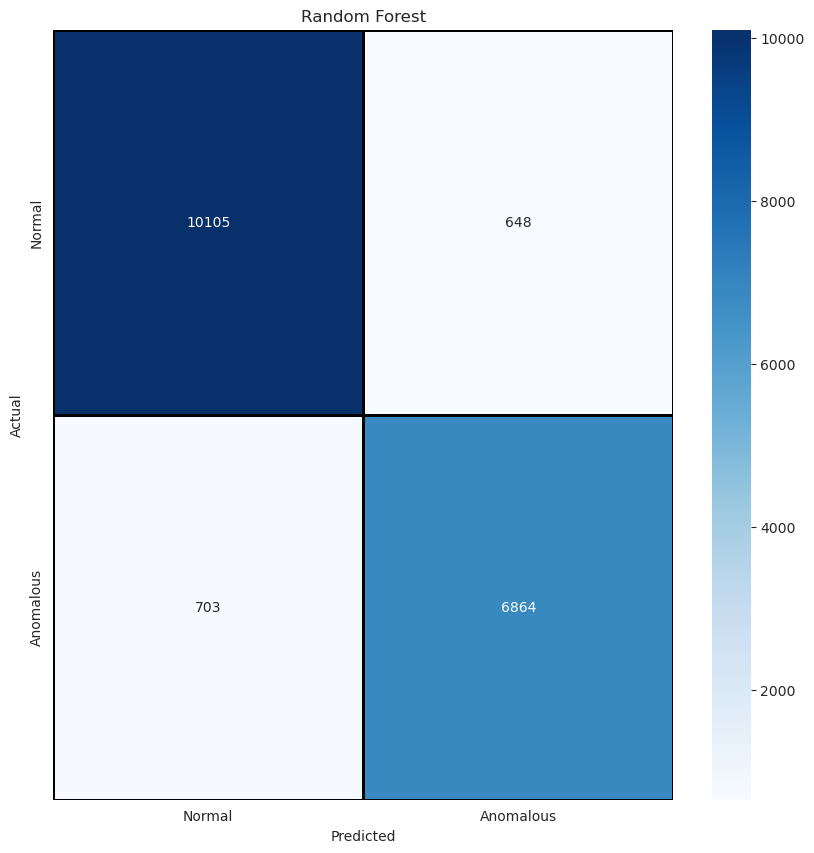

In [50]:
# Plot confusion matrix for Random Forest classifier
label = ['Normal', 'Anomalous']
cm = confusion_matrix(y_ts, RT_predictions)
cm = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])

plt.figure(figsize=(10, 10))
sns.heatmap(cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=label, yticklabels=label)
plt.title("Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**K-NEAREST NEIGHBOR**

In [51]:
# Initialize and train a K-Nearest Neighbors classifier
final_model = KNeighborsClassifier(n_neighbors=9)
final_model.fit(x_tr, y_tr)
knn_predictions = final_model.predict(x_ts)

In [52]:
# Evaluate the K-Nearest Neighbors classifier
print('MAE', mean_absolute_error(y_ts, knn_predictions))
print("Accuracy", accuracy_score(y_ts, knn_predictions))
print("Precision", precision_score(y_ts, knn_predictions, average='weighted', labels=np.unique(knn_predictions)))
print("Recall", recall_score(y_ts, knn_predictions, average='weighted', labels=np.unique(knn_predictions)))
print("F1", f1_score(y_ts, knn_predictions, average='weighted', labels=np.unique(knn_predictions)))
print("ROC AUC", roc_auc_score(y_ts, knn_predictions, average='weighted', labels=np.unique(knn_predictions)))
error_knn = (knn_predictions != y_ts).mean()
print("Test error: {:.1%}".format(error_knn))

MAE 0.08471615720524017
Accuracy 0.9152838427947598
Precision 0.915150466570833
Recall 0.9152838427947598
F1 0.9151604867156559
ROC AUC 0.911251753162618
Test error: 8.5%


<Axes: title={'center': 'KN Neighbors'}>

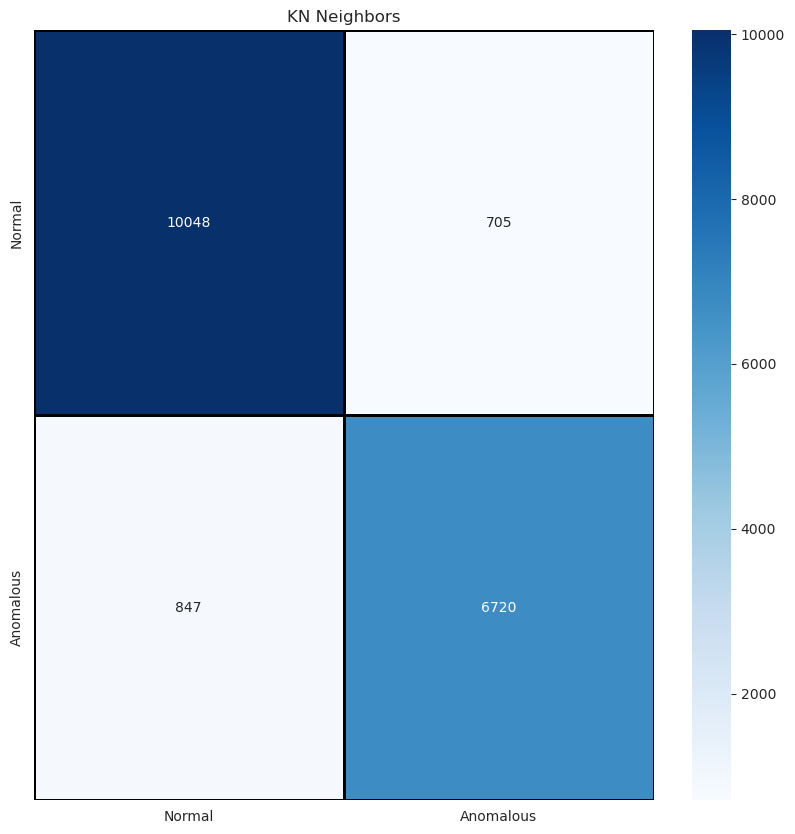

In [53]:
# Plot confusion matrix for K-Nearest Neighbors classifier
cm = confusion_matrix(y_ts,knn_predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
plt.title("KN Neighbors")
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = label,yticklabels = label)


**DECISION TREE**

In [54]:

# Initialize and train a Decision Tree classifier
DT_model = DecisionTreeClassifier(random_state=2)
print('Computing....')
DT_model.fit(x_tr,y_tr)
print('Done!')

Computing....
Done!


In [55]:
# Make predictions using the Decision Tree classifier
DT_predictions= DT_model.predict(x_ts)
# Evaluate the model
print('MAE', mean_absolute_error(y_ts, DT_predictions))
print("Accuracy", accuracy_score(y_ts, DT_predictions))
print("Precision", precision_score(y_ts, DT_predictions, average='weighted', labels=np.unique(DT_predictions)))
print("Recall", recall_score(y_ts, DT_predictions, average='weighted', labels=np.unique(DT_predictions)))
print("F1", f1_score(y_ts, DT_predictions, average='weighted', labels=np.unique(DT_predictions)))
print("ROC AUC", roc_auc_score(y_ts, DT_predictions, average='weighted', labels=np.unique(DT_predictions)))
error_dt = (DT_predictions != y_ts).mean()
print("Test error: {:.1%}".format(error_dt))

MAE 0.08133187772925764
Accuracy 0.9186681222707423
Precision 0.9185504062924272
Recall 0.9186681222707423
F1 0.9185072169864832
ROC AUC 0.9142717136873706
Test error: 8.1%


<Axes: title={'center': 'Decision Tree'}>

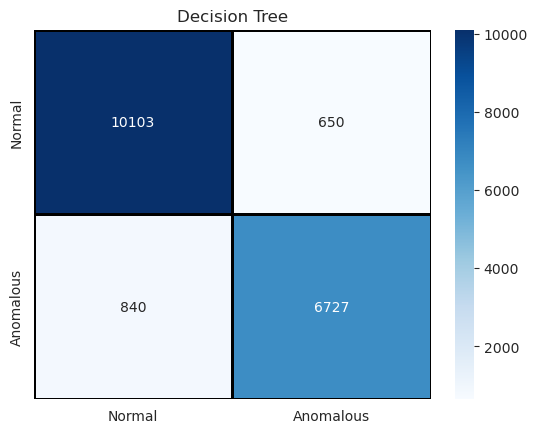

In [56]:
# Plot confusion matrix for Decision Tree classifier
cm = confusion_matrix(y_ts,DT_predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.title("Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = label,yticklabels = label)


**Logistic Regression**

In [59]:
# Initialize and train a Logistic Regression classifier
LR_model = LogisticRegression(random_state = 42, max_iter = 1000)
print('Computing....')
LR_model.fit(x_tr,y_tr)
print('Done!')

Computing....


Done!


/opt/mamba/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# Make predictions using the Logistic Regression classifier
LR_predictions= LR_model.predict(x_ts)
# Evaluate the model
print('MAE', mean_absolute_error(y_ts, LR_predictions))
print("Accuracy", accuracy_score(y_ts, LR_predictions))
print("Precision", precision_score(y_ts, LR_predictions, average='weighted', labels=np.unique(LR_predictions)))
print("Recall", recall_score(y_ts, LR_predictions, average='weighted', labels=np.unique(LR_predictions)))
print("F1", f1_score(y_ts, LR_predictions, average='weighted', labels=np.unique(LR_predictions)))
print("ROC AUC", roc_auc_score(y_ts,LR_predictions, average='weighted', labels=np.unique(LR_predictions)))
error_lr = (LR_predictions != y_ts).mean()
print("Test error: {:.1%}".format(error_lr))

MAE 0.225
Accuracy 0.775
Precision 0.775747790997299
Recall 0.775
F1 0.7702121055873042
ROC AUC 0.7538477280815391
Test error: 22.5%


<Axes: title={'center': 'Logistic Regression'}>

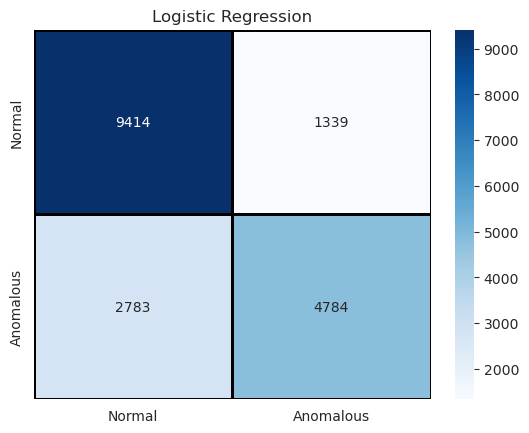

In [61]:
# Plot confusion matrix for Logistic Regression classifier
cm = confusion_matrix(y_ts,LR_predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.title("Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = label,yticklabels = label)


**Support Vector Machine (SVM)**

In [63]:
# Initialize and train a Support Vector Machine classifier
from sklearn.svm import SVC
SVC_model = SVC()
print('Computing....') 
SVC_model.fit(x_tr,y_tr)
print('Done!')

Computing....
Done!


In [64]:
# Make predictions using the Support Vector Machine classifier
SVC_predictions= SVC_model.predict(x_ts)
# Evaluate the model
print('MAE', mean_absolute_error(y_ts, SVC_predictions))
print("Accuracy", accuracy_score(y_ts, SVC_predictions))
print("Precision", precision_score(y_ts, SVC_predictions, average='weighted', labels=np.unique(SVC_predictions)))
print("Recall", recall_score(y_ts, SVC_predictions, average='weighted', labels=np.unique(SVC_predictions)))
print("F1", f1_score(y_ts, SVC_predictions, average='weighted', labels=np.unique(SVC_predictions)))
print("ROC AUC", roc_auc_score(y_ts,SVC_predictions, average='weighted', labels=np.unique(SVC_predictions)))
error_svc = (SVC_predictions != y_ts).mean()
print("Test error: {:.1%}".format(error_svc))

MAE 0.2865174672489083
Accuracy 0.7134825327510917
Precision 0.7113913094094383
Recall 0.7134825327510917
F1 0.7119658770270874
ROC AUC 0.6999754178398815
Test error: 28.7%


<Axes: title={'center': 'SVC'}>

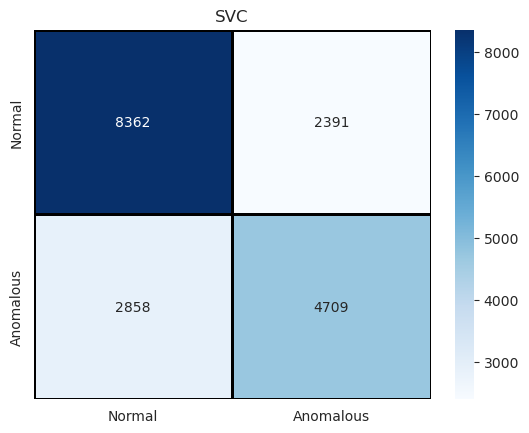

In [65]:
# Plot confusion matrix for Support Vector Machine classifier
cm = confusion_matrix(y_ts,SVC_predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.title("SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = label,yticklabels = label)


**Naïve Bayes**

In [67]:
# Initialize and train a Naïve Bayes classifier
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB ()
print('Computing....')
NB_model.fit(x_tr,y_tr)
print('Done!')

Computing....
Done!


In [68]:
# Make predictions using the Naïve Bayes classifier
NB_predictions= NB_model.predict(x_ts)
# Evaluate the model
print('MAE', mean_absolute_error(y_ts, NB_predictions))
print("Accuracy", accuracy_score(y_ts, NB_predictions))
print("Precision", precision_score(y_ts, NB_predictions, average='weighted', labels=np.unique(NB_predictions)))
print("Recall", recall_score(y_ts, NB_predictions, average='weighted', labels=np.unique(NB_predictions)))
print("F1", f1_score(y_ts, NB_predictions, average='weighted', labels=np.unique(NB_predictions)))
print("ROC AUC", roc_auc_score(y_ts,NB_predictions, average='weighted', labels=np.unique(NB_predictions)))
error_nb = (NB_predictions != y_ts).mean()
print("Test error: {:.1%}".format(error_nb))

MAE 0.3015829694323144
Accuracy 0.6984170305676856
Precision 0.7051241268906004
Recall 0.6984170305676856
F1 0.678601361031511
ROC AUC 0.6586953443131436
Test error: 30.2%


<Axes: title={'center': 'NB'}>

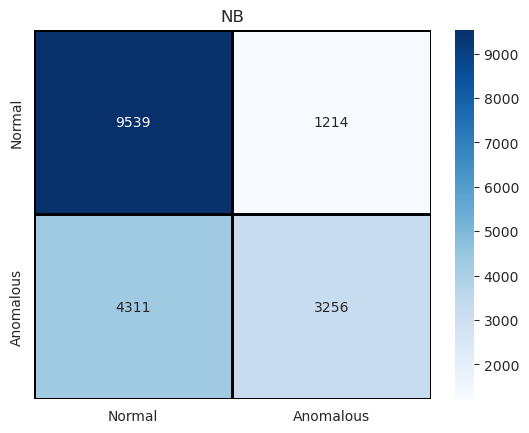

In [69]:
# Plot confusion matrix for Naïve Bayes classifier
cm = confusion_matrix(y_ts,NB_predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.title("NB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = label,yticklabels = label)


**Recurrent Neural Network (RNN)** 

In [86]:
# Encode labels for binary classification
label_encoder = LabelEncoder()
y_tr_encoded = label_encoder.fit_transform(y_tr)
y_ts_encoded = label_encoder.transform(y_ts)

# Initialize and train an RNN model
RNN_model = Sequential()
RNN_model.add(SimpleRNN(50, input_shape=(x_tr.shape[1], 1), activation='relu'))
RNN_model.add(Dense(units=1, activation='sigmoid'))  # Adjust units and activation based on your task

RNN_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
RNN_model.fit(x_tr, y_tr_encoded, epochs=50, batch_size=32, validation_data=(x_ts, y_ts_encoded))

# Evaluate the RNN model
accuracy = RNN_model.evaluate(x_ts, y_ts_encoded)[1]
print(f'Accuracy: {accuracy}')

Epoch 1/50


/opt/mamba/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1336/1336 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.6829 - loss: 0.6338 - val_accuracy: 0.7348 - val_loss: 0.5157
Epoch 2/50
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.7467 - loss: 0.4791 - val_accuracy: 0.7778 - val_loss: 0.3906
Epoch 3/50
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.7735 - loss: 0.4131 - val_accuracy: 0.7990 - val_loss: 0.3662
Epoch 4/50
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.7941 - loss: 0.3911 - val_accuracy: 0.7999 - val_loss: 0.4093
Epoch 5/50
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.8002 - loss: 0.3665 - val_accuracy: 0.7937 - val_loss: 0.3779
Epoch 6/50
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.7916 - loss: 0.3865 - val_accuracy: 0.8126 - val_loss: 0.3436
Epoch 7/50
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.7978 - loss: 0.3851 - val_accuracy: 0.8168 - val_loss: 0.3335
Epoch 8/50
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.8134 - loss: 0.35

**Artificial Neural Network (ANN)**

In [87]:
# Encode labels for binary classification
label_encoder = LabelEncoder()
y_tr_encoded = label_encoder.fit_transform(y_tr)
y_ts_encoded = label_encoder.transform(y_ts)

# Initialize and train an ANN model
ANN_model = Sequential()
ANN_model.add(Dense(50, input_shape=(x_tr.shape[1],), activation='relu'))
ANN_model.add(Dense(units=1, activation='sigmoid'))  # Adjust units and activation based on your task

ANN_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
ANN_model.fit(x_tr, y_tr_encoded, epochs=30, batch_size=32, validation_data=(x_ts, y_ts_encoded))

# Evaluate the ANN model
accuracy = ANN_model.evaluate(x_ts, y_ts_encoded)[1]
print(f'Accuracy: {accuracy}')


Epoch 1/30


/opt/mamba/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1336/1336 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6677 - loss: 1.0068 - val_accuracy: 0.7384 - val_loss: 0.4955
Epoch 2/30
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7705 - loss: 0.5087 - val_accuracy: 0.7793 - val_loss: 0.4616
Epoch 3/30
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7796 - loss: 0.4795 - val_accuracy: 0.7813 - val_loss: 0.4873
Epoch 4/30
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7820 - loss: 0.4695 - val_accuracy: 0.7944 - val_loss: 0.4668
Epoch 5/30
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7854 - loss: 0.4608 - val_accuracy: 0.7678 - val_loss: 0.4534
Epoch 6/30
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7872 - loss: 0.4542 - val_accuracy: 0.7959 - val_loss: 0.4125
Epoch 7/30
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7888 - loss: 0.4495 - val_accuracy: 0.7675 - val_loss: 0.4585
Epoch 8/30
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7929 - loss: 0.4363 - val_accurac

**Convolutional Neural Network (CNN)**

In [91]:
# Encode labels for binary classification
label_encoder = LabelEncoder()
y_tr_encoded = label_encoder.fit_transform(y_tr)
y_ts_encoded = label_encoder.transform(y_ts)

# Convert the training and testing sets to NumPy arrays
x_tr_np = x_tr.to_numpy()
x_ts_np = x_ts.to_numpy()

# Reshape training and testing sets for CNN model
x_tr_np = x_tr_np.reshape(x_tr_np.shape[0], -1)  # Flatten the input to a 1D array
x_ts_np = x_ts_np.reshape(x_ts_np.shape[0], -1)  # Flatten the input to a 1D array

# Initialize and train a CNN model
model = Sequential()
model.add(Flatten(input_shape=(x_tr_np.shape[1],)))  # Flatten the input
model.add(Dense(64, activation='relu'))  # Add a dense layer with 64 neurons and ReLU activation
model.add(Dense(32, activation='relu'))  # Add another dense layer with 32 neurons and ReLU activation
model.add(Dense(units=1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_tr_np, y_tr_encoded, epochs=30, batch_size=32, validation_data=(x_ts_np, y_ts_encoded))

# Evaluate the CNN model
accuracy = model.evaluate(x_ts_np, y_ts_encoded)[1]
print(f'Accuracy: {accuracy}')

Epoch 1/30


/opt/mamba/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1336/1336 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7075 - loss: 0.8067 - val_accuracy: 0.7514 - val_loss: 0.5595
Epoch 2/30
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7736 - loss: 0.5045 - val_accuracy: 0.7829 - val_loss: 0.4631
Epoch 3/30
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7805 - loss: 0.5004 - val_accuracy: 0.7808 - val_loss: 0.4392
Epoch 4/30
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7922 - loss: 0.4506 - val_accuracy: 0.7832 - val_loss: 0.4267
Epoch 5/30
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7905 - loss: 0.4364 - val_accuracy: 0.7788 - val_loss: 0.4436
Epoch 6/30
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8010 - loss: 0.4088 - val_accuracy: 0.8114 - val_loss: 0.3806
Epoch 7/30
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8119 - loss: 0.3765 - val_accuracy: 0.8016 - val_loss: 0.4430
Epoch 8/30
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8211 - loss: 0.3511 - val_accurac

**Long Short-Term Memory (LSTM)**

In [94]:
# Encode labels for binary classification
label_encoder = LabelEncoder()
y_tr_encoded = label_encoder.fit_transform(y_tr)
y_ts_encoded = label_encoder.transform(y_ts)

# Initialize and train an LSTM model
LSTM_model = Sequential()
LSTM_model.add(LSTM(50, input_shape=(x_tr.shape[1], 1), activation='relu'))
LSTM_model.add(Dense(units=1, activation='sigmoid'))  # Adjust units and activation based on your task

LSTM_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
LSTM_model.fit(x_tr, y_tr_encoded, epochs=25, batch_size=32, validation_data=(x_ts, y_ts_encoded))

# Evaluate the LSTM model
accuracy = LSTM_model.evaluate(x_ts, y_ts_encoded)[1]
print(f'Accuracy: {accuracy}')


Epoch 1/25


/opt/mamba/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1336/1336 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.6680 - loss: 0.6218 - val_accuracy: 0.6981 - val_loss: 0.5125
Epoch 2/25
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 63s 47ms/step - accuracy: 0.7244 - loss: 0.4989 - val_accuracy: 0.7551 - val_loss: 0.4681
Epoch 3/25
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 61s 46ms/step - accuracy: 0.7617 - loss: 0.4579 - val_accuracy: 0.7342 - val_loss: 0.4859
Epoch 4/25
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 64s 48ms/step - accuracy: 0.7559 - loss: 0.4596 - val_accuracy: 0.7826 - val_loss: 0.4312
Epoch 5/25
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 63s 47ms/step - accuracy: 0.7795 - loss: 0.4229 - val_accuracy: 0.7620 - val_loss: 0.4399
Epoch 6/25
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 61s 46ms/step - accuracy: 0.8023 - loss: 0.3940 - val_accuracy: 0.8043 - val_loss: 0.3594
Epoch 7/25
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 71s 53ms/step - accuracy: 0.7579 - loss: 0.4800 - val_accuracy: 0.6966 - val_loss: 0.5789
Epoch 8/25
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 62s 46ms/step - accuracy: 0.7713 - loss: 0.44

**RANKING THE TRAINED MODELS ON THE MAE VALUE**


In [97]:
# Calculate and rank models based on accuracy scores
model_preds = [RT_predictions, knn_predictions, DT_predictions, LR_predictions, SVC_predictions, NB_predictions]
model_names = ['Random Forest', 'K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression', 'SVC', 'NB']

def score_model(model_preds, y_ts):
    return accuracy_score(y_ts, model_preds)

acc_score = []
for i in range(len(model_names)):
    acc = score_model(model_preds[i], y_ts)
    acc_score.append((model_names[i], acc))

acc_scores_sorted = sorted(acc_score, key=lambda x: x[1], reverse=True)
target_range = y_ts.max() - y_ts.min()

for i, (model_name, acc) in enumerate(acc_scores_sorted):
    error_percent = (acc / target_range) * 100  # Calculate error percentage
    print("Rank %d: %s - ACC: %.4f - Accuracy: %.2f%%" % (i+1, model_name, acc, error_percent))

Rank 1: Random Forest - ACC: 0.9263 - Accuracy: 92.63%
Rank 2: Decision Tree - ACC: 0.9187 - Accuracy: 91.87%
Rank 3: K-Nearest Neighbors - ACC: 0.9153 - Accuracy: 91.53%
Rank 4: Logistic Regression - ACC: 0.7750 - Accuracy: 77.50%
Rank 5: SVC - ACC: 0.7135 - Accuracy: 71.35%
Rank 6: NB - ACC: 0.6984 - Accuracy: 69.84%
